In [15]:
import pandas as pd
import seaborn as sns

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('./winequality-total.csv')

In [18]:
df.head()

,Color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
red=df.loc[df.Color=='Red']

In [21]:
white=df.loc[df.Color=='White']

In [22]:
white.head()

,Color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1599,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1600,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1601,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
1602,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
1603,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


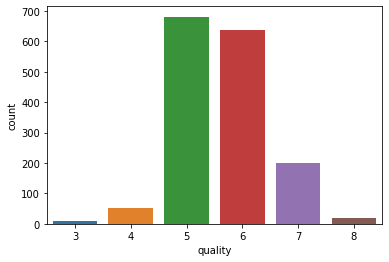

In [23]:
sns.countplot(x='quality',data=red)

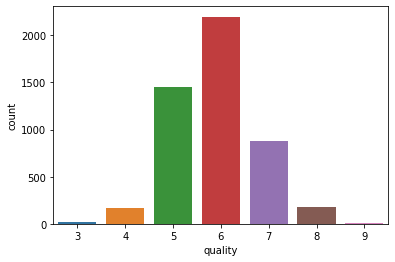

In [24]:
sns.countplot(x='quality',data=white)

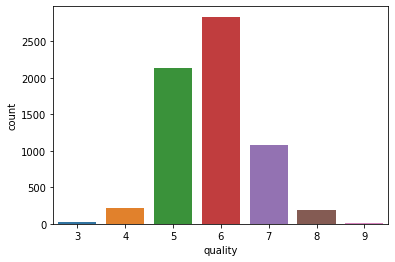

In [25]:
sns.countplot(x='quality',data=df)

In [31]:
Corr_red=red.corr(method='pearson')
Corr_white=white.corr(method='pearson')

In [32]:
print(Corr_red.quality)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


In [33]:
print(Corr_white.quality)

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64


In [35]:
Corr=df.corr(method='pearson')
print(Corr.quality)

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64


In [36]:
def qcode(quality):
    if quality>=6:
        return 1
    else:
        return 0
    

In [62]:
df['q_code']=df['quality'].apply(qcode)

In [63]:
df['q_code'].value_counts()


1    4113
0    2384
Name: q_code, dtype: int64

In [64]:
X=df.drop(['quality','Color'],axis=1).values


In [65]:
print(X)

[[ 7.4   0.7   0.   ...  0.56  9.4   0.  ]
 [ 7.8   0.88  0.   ...  0.68  9.8   0.  ]
 [ 7.8   0.76  0.04 ...  0.65  9.8   0.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   1.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   1.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   1.  ]]


In [66]:
Y=df['q_code'].values

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

In [68]:
from sklearn.metrics import confusion_matrix, classification_report,precision_score

In [69]:
lda=LinearDiscriminantAnalysis()

In [70]:
model=lda.fit(X, Y)

/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [71]:
print(model.priors_)
pred=model.predict(X)

[0.36693859 0.63306141]


In [72]:
print(confusion_matrix(pred, Y))

[[1340  658]
 [1044 3455]]


In [73]:
print(classification_report(Y, pred, digits=3))

              precision    recall  f1-score   support

           0      0.671     0.562     0.612      2384
           1      0.768     0.840     0.802      4113

    accuracy                          0.738      6497
   macro avg      0.719     0.701     0.707      6497
weighted avg      0.732     0.738     0.732      6497



In [76]:
red['q_code']=red['quality'].apply(qcode)
white['q_code']=white['quality'].apply(qcode)

/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
x_red=red.drop(['quality','Color'],axis=1).values
x_white=white.drop(['quality','Color'],axis=1).values

In [79]:
y_red=red['q_code'].values
y_white=white['q_code'].values

In [89]:
model=lda.fit(x_red, y_red)


/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [92]:
print(model.priors_)

[0.46529081 0.53470919]


In [93]:
pred_red=model.predict(x_red)

In [98]:
print(confusion_matrix(pred_red,y_red ))
print(classification_report(y_red, pred_red, digits=3))

[[555 218]
 [189 637]]
              precision    recall  f1-score   support

           0      0.718     0.746     0.732       744
           1      0.771     0.745     0.758       855

    accuracy                          0.745      1599
   macro avg      0.745     0.745     0.745      1599
weighted avg      0.746     0.745     0.746      1599



In [95]:
model=lda.fit(x_white, y_white)

/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [96]:
print(model.priors_)

[0.33483054 0.66516946]


In [97]:
pred_white=model.predict(x_white)
print(confusion_matrix(pred_white,y_white ))

[[ 802  374]
 [ 838 2884]]


In [99]:
print(classification_report(y_white, pred_white, digits=3))

              precision    recall  f1-score   support

           0      0.682     0.489     0.570      1640
           1      0.775     0.885     0.826      3258

    accuracy                          0.753      4898
   macro avg      0.728     0.687     0.698      4898
weighted avg      0.744     0.753     0.740      4898



In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [104]:
model.fit(x_white, y_white)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
pred_white=model.predict(x_white)

In [107]:
confusion_matrix(y_white, model.predict(x_white))

array([[1640,    0],
       [   0, 3258]])

In [108]:
from sklearn.model_selection import train_test_split

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x_white, y_white, test_size=0.40, random_state=1)

In [145]:
model=lda.fit(x_train, y_train)
pred_white=model.predict(x_test)

/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [146]:
print(confusion_matrix(pred_white,y_test ))

[[ 305  142]
 [ 360 1153]]


In [147]:
print(classification_report(y_test, pred_white, digits=3))

              precision    recall  f1-score   support

           0      0.682     0.459     0.549       665
           1      0.762     0.890     0.821      1295

    accuracy                          0.744      1960
   macro avg      0.722     0.674     0.685      1960
weighted avg      0.735     0.744     0.729      1960



In [150]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr .fit(x_train, y_train)
pred_whitelr=logisticRegr.predict(x_test)

/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [151]:
confusion_matrix(pred_whitelr, y_test)

array([[ 665,    0],
       [   0, 1295]])

1.0


In [132]:
#red

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x_red, y_red, test_size=0.40, random_state=1)

In [154]:
model=lda.fit(x_train, y_train)
pred_red=model.predict(x_test)

/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [155]:
print(confusion_matrix(pred_red,y_test ))

[[225  87]
 [ 73 255]]


In [157]:
print(classification_report(y_test, pred_red, digits=3))

              precision    recall  f1-score   support

           0      0.721     0.755     0.738       298
           1      0.777     0.746     0.761       342

    accuracy                          0.750       640
   macro avg      0.749     0.750     0.749       640
weighted avg      0.751     0.750     0.750       640



In [158]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr .fit(x_train, y_train)
pred_redlr=logisticRegr.predict(x_test)

/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [159]:
confusion_matrix(pred_redlr, y_test)

array([[298,   0],
       [  0, 342]])